# Exploratory Data Analysis - USA and CAN dataset

The purpose of this assignment is to explore the CPIs datasets for United States of America (hereafter, USA) and Canada (hereafter, CAN).

The basic statistics are first explored, followed by visualisation of the datasets. Where the data integrity issues were identified, the attempt to solve this problem is also discussed.

## Import packages

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

## Import data files and explore the basic statistics

In this section, I will import files into Pandas data frame and examine basic statistics such as mean, standard deviation, count and qualtile values.

### USA

In [3]:
usa_df = pd.read_excel("data/USA.xls")

In [4]:
usa_df.rename(columns={list(usa_df)[0]:'Year_Month'}, inplace=True)

In [5]:
usa_df = usa_df.reset_index()

In [6]:
usa_df.head()

index Year_Month   CH0   CH1   CH2   CH3   CH4   CH5   CH6   CH7  ...  \
0      0    1976:01  53.7  65.0  58.8  73.3  44.0  47.0  64.6  94.3  ...   
1      1    1976:02  54.1  65.0  58.9  73.3  44.0  47.6  65.0  95.8  ...   
2      2    1976:03  54.2  64.3  59.3  73.5  44.0  48.5  65.4  97.1  ...   
3      3    1976:04  54.5  65.0  59.6  75.2  44.1  48.7  65.6  95.2  ...   
4      4    1976:05  54.8  64.7  59.8  75.2  44.3  49.1  65.5  97.2  ...   

    PIW   SFW   CHW   LAW   NYW   PHW   WAW   STW   MIW  USAPPI  
0  6.17  6.58  5.73  5.06  4.83  5.42  5.34  5.82  3.77    51.6  
1  6.21  6.58  5.74  5.05  4.85  5.42  5.38  5.82  3.77    51.6  
2  6.25  6.63  5.74  5.06  4.83  5.45  5.42  5.82  3.78    51.6  
3  6.31  6.68  5.80  5.10  4.84  5.43  5.44  5.84  3.87    52.1  
4  6.33  6.76  5.83  5.13  4.89  5.49  5.46  5.93  3.81    52.3  

[5 rows x 227 columns]

In [7]:
usa_df.tail()

index Year_Month    CH0    CH1    CH2    CH3    CH4    CH5    CH6    CH7  \
228    228    1995:01  151.8  155.9  138.2  159.2  170.9  116.8  118.2  127.6   
229    229    1995:02  152.3  157.5  138.0  162.1  171.8  114.5  117.7  121.9   
230    230    1995:03  152.6  156.7  139.0  162.8  172.7  112.3  117.1  126.7   
231    231    1995:04  153.1  157.3  138.9  163.7  173.6  111.6  118.1  124.8   
232    232    1995:05  153.0  155.8  139.4  162.8  174.2  110.8  118.3  126.9   

     ...    PIW    SFW    CHW    LAW    NYW    PHW    WAW    STW      MIW  \
228  ...  13.87  14.03  12.37  11.87  11.29  13.68  13.75  13.95 -9999.99   
229  ...  13.83  14.00  12.38  11.76  11.15  13.68  13.59  14.12 -9999.99   
230  ...  13.79  13.85  12.42  11.80  11.24  13.63  13.79  14.20 -9999.99   
231  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN   
232  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN   

     USAPPI  
228     NaN  
229     NaN  
230     NaN  
231     NaN  
232     NaN  

[5 rows x 227 columns]

In [8]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Columns: 227 entries, index to USAPPI
dtypes: float64(225), int64(1), object(1)
memory usage: 413.3+ KB


According to the information on the USA dataset, the number of records is 50,175 (233x225). There may be Not a Number (NaN) records.

In [9]:
def count_na(df):
    return df.isna().sum().sum()

In [10]:
count_na(usa_df)

393

393 records do not have values, resulting in 49,782 usable records.

The names of columns are difficult to understand, I will list them here upfront. The alphabets represent city names while the numeric ids are related to various names of the goods. For example, "CH0" represents Chicago's City CPI according to the list below.

In [11]:
goods_descriptions = {"0": "City CPI",
"1": "Food at home",
"2": "Food away from home",
"3": "Alcoholic beverages",
"4": "Shelter",
"5": "Fuel and other utilities",
"6": "Household furnishings & operations",
"7": "Men's and boy's apparel",
"8": "Women's and girl's apparel",
"9": "Footwear",
"10": "Private transportation",
"11": "Public transportation",
"12": "Medical care",
"13": "Personal care",
"14": "Entertainment"}

usa_city_names = {"CH": "Chicago",
"LA": "Los Angeles",
"NY": "New York City",
"PH": "Philadelphia",
"DA": "Dallas",
"DT": "Detroit",
"HS": "Houston",
"PI": "Pittsburgh",
"SF": "San Francisco",
"BA": "Baltimore",
"BO": "Boston",
"MI": "Miami",
"ST": "St. Louis",
"WA": "Washington, DC"}

can_city_names = {"Q": "Quebec",
"M": "Montreal",
"O": "Ottawa",
"T": "Toronto",
"W": "Winnipeg",
"R": "Regina",
"E": "Edmonton",
"C": "Calgary",
"V": "Vancouver"}

In [12]:
usa_df.describe().transpose()

count         mean          std      min     25%     50%      75%  \
index   233.0   116.000000    67.405489     0.00  58.000  116.00  174.000   
CH0     233.0   106.370386    29.227897    53.70  86.700  108.50  132.000   
CH1     233.0   110.029185    25.795085    64.30  96.000  103.30  135.200   
CH2     233.0   104.248927    22.750771    58.80  91.600  106.20  123.200   
CH3     233.0   112.962661    26.989484    73.30  93.400  106.40  130.600   
...       ...          ...          ...      ...     ...     ...      ...   
PHW     231.0     9.931082     2.501079     5.42   7.880   10.02   11.915   
WAW     231.0    10.144113     2.483309     5.34   8.570   10.34   12.470   
STW     231.0    10.589567     2.502536     5.82   8.430   11.14   12.820   
MIW     231.0 -1163.378182  3221.771068 -9999.99   4.530    6.11    7.115   
USAPPI  228.0    85.203947    15.405855    51.60  79.575   88.45   98.300   

           max  
index   232.00  
CH0     153.10  
CH1     157.50  
CH2     139.40  
CH3     163.70  
...        ...  
PHW      13.72  
WAW      13.90  
STW      14.21  
MIW       8.39  
USAPPI  104.80  

[226 rows x 8 columns]

Just by looking at the descriptive statistics above, Chicago's mean, std, min and max seem to be reasonable except 'Personal care' goods while Washington, DC's descriptive statistics seems to have data integrity problems in every goods category. In addition, the 'W' category for San Francisco and Los Angeles seems to be completely out of contexts since it has mean and first quartile of -9999.99.

If these data possessing integrity issues is counted towards the whole USA's data, I expect this aggregated figure would not represent appropriate descriptions of the USA's CPI. That is, this USA dataset has a seriour data quality issues.

### Canada

In [13]:
can_df = pd.read_excel("data/CAN.xls")

In [14]:
can_df.rename(columns={list(can_df)[0]:'Year_Month'}, inplace=True)

In [15]:
can_df = can_df.reset_index()

In [16]:
can_df.head()

index Year_Month  Q0  M0  O0  T0  W0  R0  E0  C0  ...  CANPPI  QW  MW  OW  \
0      0    1974:01 NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN NaN NaN NaN   
1      1    1974:02 NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN NaN NaN NaN   
2      2    1974:03 NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN NaN NaN NaN   
3      3    1974:04 NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN NaN NaN NaN   
4      4    1974:05 NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN NaN NaN NaN   

   TW  WW  RW  EW  CW  VW  
0 NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN NaN  

[5 rows x 148 columns]

In [17]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Columns: 148 entries, index to VW
dtypes: float64(146), int64(1), object(1)
memory usage: 297.3+ KB


In [18]:
count_na(can_df)

8051

It appears that the dataset Canada has a greater range of time periods with a smaller number of columns than the USA dataset. There are 37,522 records but many NaN records exist, leaving only 29,471 usable records.

In [19]:
can_df.describe().transpose()

count        mean        std    min      25%      50%       75%     max
index  257.0  128.000000  74.333707   0.00  64.0000  128.000  192.0000  256.00
Q0     196.0   99.602551  22.338695  55.60  85.4000  101.600  119.3500  130.20
M0     196.0  100.261224  23.014163  55.70  85.1000  101.750  120.8250  132.00
O0     196.0  100.486224  22.665498  56.70  84.3000  101.350  121.3500  132.90
T0     196.0  101.433673  23.990953  55.40  84.6500  101.850  125.2250  133.10
...      ...         ...        ...    ...      ...      ...       ...     ...
WW     230.0    9.574609   2.514225   4.87   7.4200    9.640   11.6150   13.63
RW     230.0   11.161304   2.577548   5.72   9.1225   11.615   12.9850   15.01
EW     230.0   11.593957   2.703217   5.90   9.5850   12.225   13.2875   16.01
CW     230.0   11.593957   2.703217   5.90   9.5850   12.225   13.2875   16.01
VW     230.0   13.832304   3.335107   7.10  11.3175   14.455   16.4925   19.31

[147 rows x 8 columns]

Though the dataset for Canada has a smaller number of records, the integrity of data seems to be better since it is difficult to find extreme and consistent min or max values. The whole Canadian CPI seems to be in range with individual cities' and goods' CPIs.

## Visualise and explore relationships

### Set up year and month fields

Before visualising figures, I will make a year and month column separately otherwise the holistic graphs will be difficult to be visualised.

In [20]:
usa_df['Year'] = usa_df.apply(lambda x: x['Year_Month'][:4], 1)
usa_df['Month'] = usa_df.apply(lambda x: x['Year_Month'][5:7], 1)
can_df['Year'] = can_df.apply(lambda x: x['Year_Month'][:4], 1)
can_df['Month'] = can_df.apply(lambda x: x['Year_Month'][5:7], 1)

In [21]:
usa_df.head()

index Year_Month   CH0   CH1   CH2   CH3   CH4   CH5   CH6   CH7  ...  \
0      0    1976:01  53.7  65.0  58.8  73.3  44.0  47.0  64.6  94.3  ...   
1      1    1976:02  54.1  65.0  58.9  73.3  44.0  47.6  65.0  95.8  ...   
2      2    1976:03  54.2  64.3  59.3  73.5  44.0  48.5  65.4  97.1  ...   
3      3    1976:04  54.5  65.0  59.6  75.2  44.1  48.7  65.6  95.2  ...   
4      4    1976:05  54.8  64.7  59.8  75.2  44.3  49.1  65.5  97.2  ...   

    CHW   LAW   NYW   PHW   WAW   STW   MIW  USAPPI  Year  Month  
0  5.73  5.06  4.83  5.42  5.34  5.82  3.77    51.6  1976     01  
1  5.74  5.05  4.85  5.42  5.38  5.82  3.77    51.6  1976     02  
2  5.74  5.06  4.83  5.45  5.42  5.82  3.78    51.6  1976     03  
3  5.80  5.10  4.84  5.43  5.44  5.84  3.87    52.1  1976     04  
4  5.83  5.13  4.89  5.49  5.46  5.93  3.81    52.3  1976     05  

[5 rows x 229 columns]

In [22]:
can_df.head()

index Year_Month  Q0  M0  O0  T0  W0  R0  E0  C0  ...  MW  OW  TW  WW  RW  \
0      0    1974:01 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1      1    1974:02 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
2      2    1974:03 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
3      3    1974:04 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
4      4    1974:05 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   

   EW  CW  VW  Year  Month  
0 NaN NaN NaN  1974     01  
1 NaN NaN NaN  1974     02  
2 NaN NaN NaN  1974     03  
3 NaN NaN NaN  1974     04  
4 NaN NaN NaN  1974     05  

[5 rows x 150 columns]

### USA

Prior to the visualisation, it would be useful to take an average of CPIs by category per year since there are too many data points (i.e. 12 data points per each year) to visualise. I will use a groupby function to take the mean for each year per goods category.

In [23]:
usa_cpi_mean = usa_df.groupby(['Year'], as_index=False).mean()
usa_cpi_mean

Year  index         CH0         CH1         CH2         CH3         CH4  \
0   1976    5.5   55.266667   65.308333   60.191667   74.833333   44.708333   
1   1977   17.5   58.741667   69.033333   64.641667   76.491667   47.508333   
2   1978   29.5   63.850000   77.508333   71.366667   81.241667   54.233333   
3   1979   41.5   71.816667   85.625000   79.791667   86.158333   63.866667   
4   1980   53.5   82.175000   92.416667   88.833333   90.958333   76.025000   
5   1981   65.5   90.041667   97.891667   93.675000   95.091667   84.191667   
6   1982   77.5   96.183333   99.641667   96.933333   98.050000   94.200000   
7   1983   89.5  100.016667   98.750000  100.483333   99.500000  100.000000   
8   1984  101.5  103.791667  101.591667  102.600000  102.433333  105.766667   
9   1985  113.5  107.708333  103.141667  106.016667  105.908333  112.591667   
10  1986  125.5  109.958333  108.950000  108.341667  111.950000  118.041667   
11  1987  137.5  114.491667  114.225000  111.000000  115.450000  123.975000   
12  1988  149.5  118.966667  118.866667  113.666667  119.108333  131.183333   
13  1989  161.5  124.983333  125.541667  116.708333  125.200000  137.616667   
14  1990  173.5  131.700000  134.966667  122.475000  130.125000  145.300000   
15  1991  185.5  137.041667  139.058333  127.033333  144.491667  151.750000   
16  1992  197.5  141.058333  141.650000  131.525000  151.800000  156.683333   
17  1993  209.5  145.408333  145.816667  134.758333  156.916667  160.358333   
18  1994  221.5  148.591667  151.150000  136.333333  160.100000  166.466667   
19  1995  230.0  152.560000  156.640000  138.700000  162.120000  172.640000   

           CH5         CH6         CH7  ...        PIW          SFW  \
0    49.366667   65.958333   95.825000  ...   6.427500     6.815833   
1    53.941667   68.766667   97.550000  ...   7.074167     7.310833   
2    56.783333   72.391667   92.733333  ...   7.698333     7.792500   
3    63.766667   78.850000   91.116667  ...   8.491667     8.454167   
4    74.016667   86.725000   93.866667  ...   9.232500     9.209167   
5    84.600000   93.308333   96.058333  ...  10.006667    10.337500   
6    93.016667   98.325000   96.233333  ...  10.666667 -9999.990000   
7   102.083333  100.466667  100.683333  ...  10.833333 -9999.990000   
8   104.891667  101.200000  103.058333  ...  10.777500 -9999.990000   
9   105.775000  104.750000  104.958333  ...  11.015000 -9999.990000   
10  105.108333  106.308333  102.283333  ...  11.063333 -9999.990000   
11  104.341667  106.508333  110.025000  ...  11.179167 -9999.990000   
12  102.000000  109.566667  116.450000  ...  11.150000    12.936667   
13  108.166667  112.400000  118.250000  ...  11.158333    12.968333   
14  108.875000  113.641667  116.900000  ...  11.440000    12.815833   
15  111.858333  116.525000  115.391667  ...  11.877500    12.995000   
16  113.566667  117.558333  120.891667  ...  12.762500    13.209167   
17  119.658333  116.883333  128.883333  ...  13.251667    13.509167   
18  110.725000  116.016667  127.725000  ...  13.645833    13.785833   
19  113.200000  117.880000  125.580000  ...  13.830000    13.960000   

          CHW          LAW        NYW        PHW        WAW        STW  \
0    5.894167     5.201667   4.928333   5.560000   5.438333   6.012500   
1    6.240000     5.590000   5.229167   6.014167   5.494167   6.538333   
2    6.575000     5.955000   5.460833   6.526667   6.713333   7.077500   
3    7.031667     6.568333   5.865000   7.021667   7.737500   7.544167   
4    7.573333     7.276667   6.411667   7.592500   8.386667   8.187500   
5    8.234167     8.064167   6.953333   8.325833   8.884167   8.985000   
6    8.841667 -9999.990000   7.501667   8.890833   9.371667   9.627500   
7    9.545833 -9999.990000   8.007500   9.366667   9.741667  10.101667   
8    9.820833 -9999.990000   8.380833   9.650833  10.096667  10.653333   
9   10.165000 -9999.990000   8.830000  10.025833  10.480833  11.107500   
10  10.460000 -9999.990000   9.171667 

In [24]:
can_cpi_mean = can_df.groupby(['Year'], as_index=False).mean()
can_cpi_mean

Year  index          Q0          M0          O0          T0          W0  \
0   1974    5.5         NaN         NaN         NaN         NaN         NaN   
1   1975   17.5         NaN         NaN         NaN         NaN         NaN   
2   1976   29.5         NaN         NaN         NaN         NaN         NaN   
3   1977   41.5         NaN         NaN         NaN         NaN         NaN   
4   1978   53.5   56.175000   56.200000   57.500000   56.250000   58.875000   
5   1979   65.5   59.875000   60.000000   61.116667   59.966667   62.491667   
6   1980   77.5   66.291667   66.216667   67.058333   66.050000   68.725000   
7   1981   89.5   74.375000   74.458333   74.958333   74.300000   76.400000   
8   1982  101.5   83.383333   83.025000   82.416667   82.675000   83.100000   
9   1983  113.5   87.966667   87.641667   87.925000   87.700000   88.675000   
10  1984  125.5   91.200000   91.308333   92.341667   91.858333   91.883333   
11  1985  137.5   95.316667   95.308333   96.183333   95.483333   95.708333   
12  1986  149.5  100.008333   99.975000  100.000000  100.000000   99.983333   
13  1987  161.5  103.891667  104.458333  103.958333  105.583333  104.158333   
14  1988  173.5  107.541667  108.516667  108.308333  110.933333  108.541667   
15  1989  185.5  111.783333  113.316667  113.691667  117.908333  113.708333   
16  1990  197.5  116.533333  118.141667  119.100000  123.416667  118.925000   
17  1991  209.5  125.241667  126.858333  125.858333  128.600000  125.041667   
18  1992  221.5  127.458333  129.300000  127.625000  129.741667  126.883333   
19  1993  233.5  129.175000  131.133333  130.458333  131.833333  130.300000   
20  1994  245.5  128.075000  129.208333  131.108333  131.950000  132.158333   
21  1995  254.0         NaN         NaN         NaN         NaN         NaN   

            R0          E0          C0  ...      CANPPI         QW         MW  \
0          NaN         NaN         NaN  ...         NaN        NaN        NaN   
1          NaN         NaN         NaN  ...         NaN        NaN        NaN   
2          NaN         NaN         NaN  ...         NaN   5.163333   5.163333   
3          NaN         NaN         NaN  ...         NaN   5.767500   5.767500   
4    59.625000   59.200000   58.975000  ...   53.891667   6.224167   6.224167   
5    63.416667   62.925000   62.608333  ...   61.700000   6.804167   6.804167   
6    69.825000   69.275000   69.075000  ...   70.000000   7.544167   7.544167   
7    78.000000   77.975000   78.250000  ...   77.125000   8.474167   8.474167   
8    84.991667   86.350000   87.683333  ...   81.766667   9.459167   9.459167   
9    90.466667   91.350000   91.591667  ...   84.608333   9.932500   9.932500   
10   94.433333   93.883333   93.908333  ...   88.025000  10.440833  10.440833   
11   97.925000   96.750000   96.633333  ...   90.383333  10.824167  10.824167   
12   99.991667  100.000000  100.016667  ...   91.141667  11.081667  11.081667   
13  104.966667  104.208333  103.783333  ...   93.675000  11.410000  11.410000   
14  109.441667  107.050000  106.550000  ...   97.716667  11.815833  11.815833   
15  114.350000  111.825000  110.716667  ...   99.733333  12.555000  12.555000   
16  119.225000  117.758333  117.600000  ...  100.000000  13.230833  13.230833   
17  125.591667  124.366667  124.633333  ...   98.966667  13.579167  13.579167   
18  127.191667  126.600000  126.291667  ...   99.466667  14.100000  14.100000   
19  131.283333  127.641667  127.975000  ...  102.741667  14.329167  14.329167   
20  133.791667  129.641667  129.783333  ...  108.533333  14.500833  14.500833   
21         NaN         NaN         NaN  ...         NaN  14.460000  14.460000   

           OW         TW         WW         RW         EW         CW  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2    5.871667   5.871667   5.167500   6.128333   6.252500   6.252500   
3    6.466667   6.466667   5.69250

The function 'visualise_graphs' below takes the data frame and the dictionary of the cities to output the plots per category per city.

In [25]:
def visualise_graphs(df, cities, start):
    years = [int(year) for year in np.arange(start,1996)]
    for city in cities:
        f = plt.figure(figsize = (60, 4))
        print("City: "+ cities[city])
        for j, goods in enumerate(goods_descriptions):
            ax = f.add_subplot(1, 15, j+1)
            cpi = df.loc[:, city+goods]
            ax.plot(years, cpi)
            ax.set_xlabel("Years")
            ax.set_ylabel(goods_descriptions[goods] + " Price Indexes")
            ax.set_xticklabels(years, rotation=90)
        plt.show()

### USA CPIs by City

As expected, many graphs in the USA dataset from 1974 to 1995 seem to be based on corrupted data, having CPI smaller than -800.00.

If the data is OK, for instance New York City's CPI, the general trend of CPIs is an increase, as expected. The increase in CPIs can be smoothly skyrockted or fluctuating with the overall upward trend.

City: Chicago


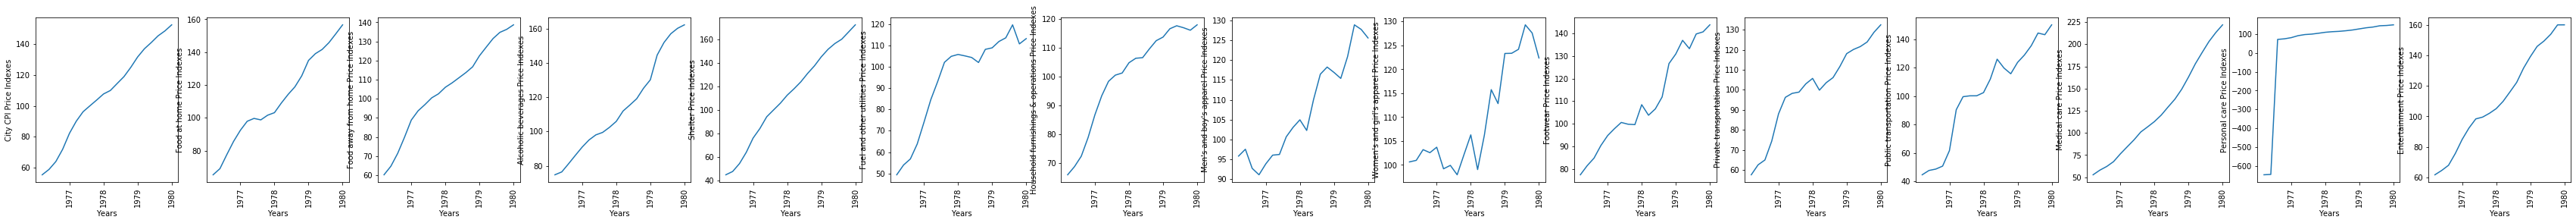

City: Los Angeles


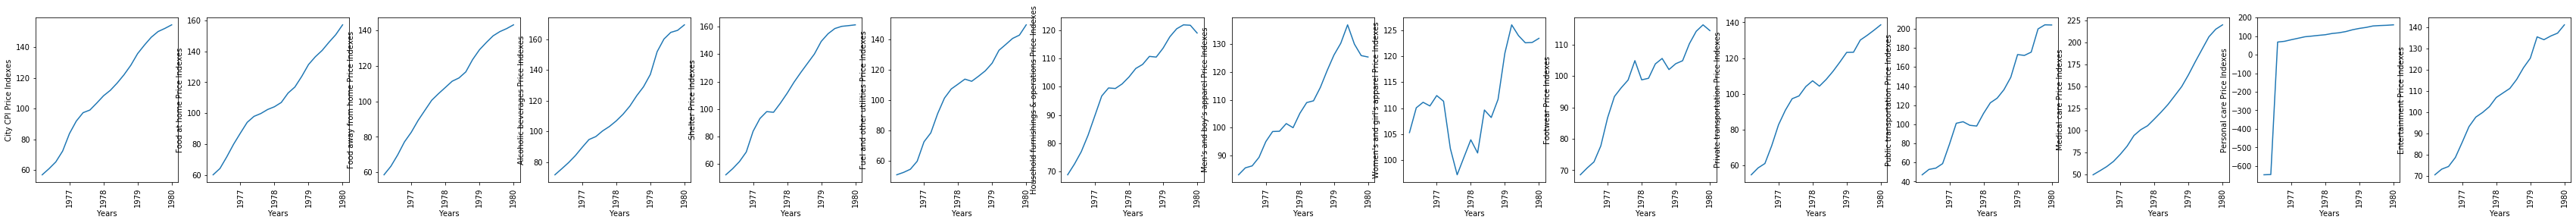

City: New York City


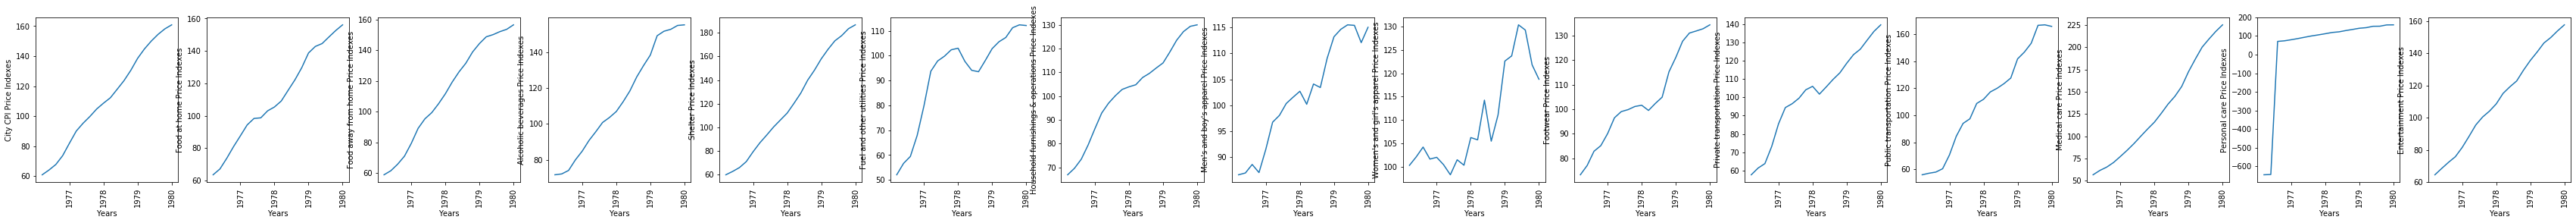

City: Philadelphia


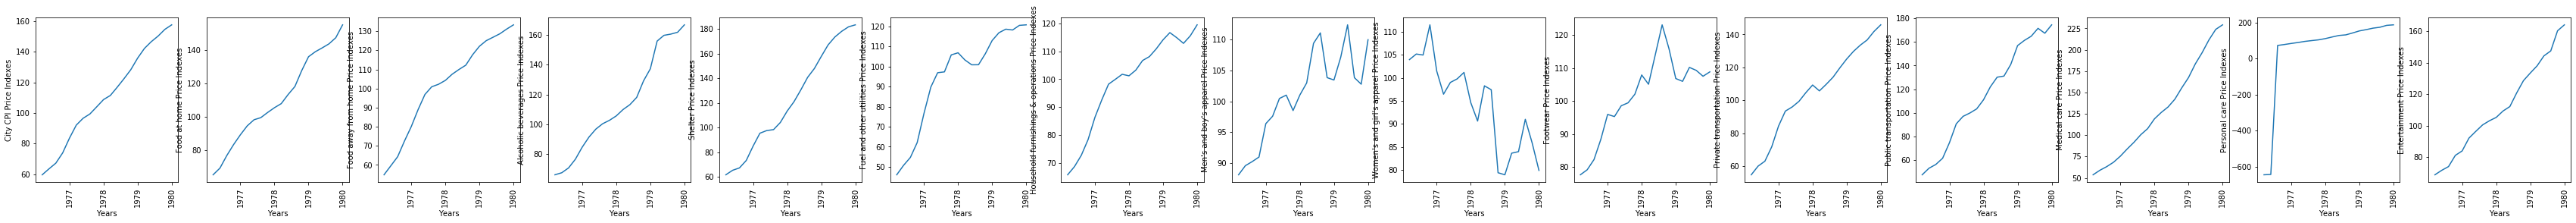

City: Dallas


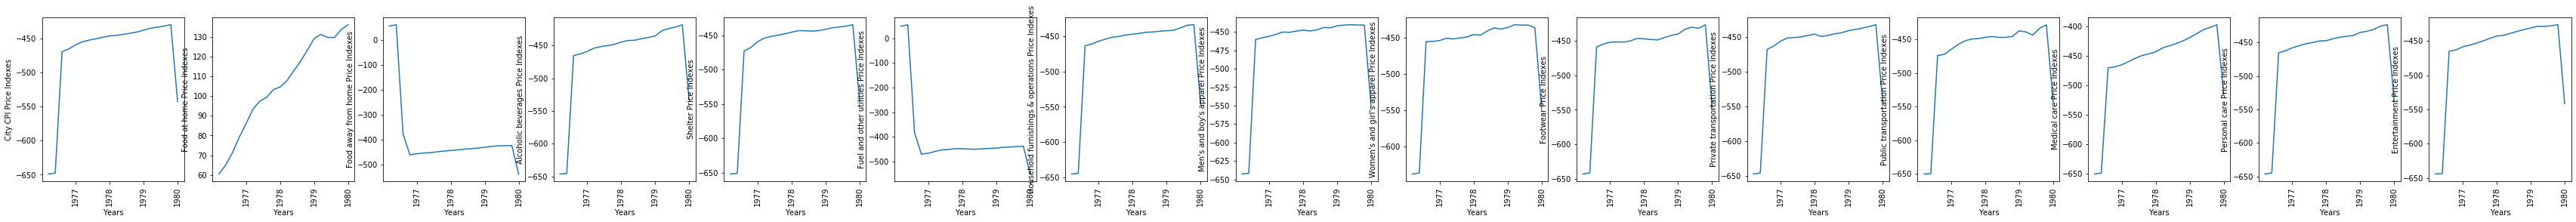

City: Detroit


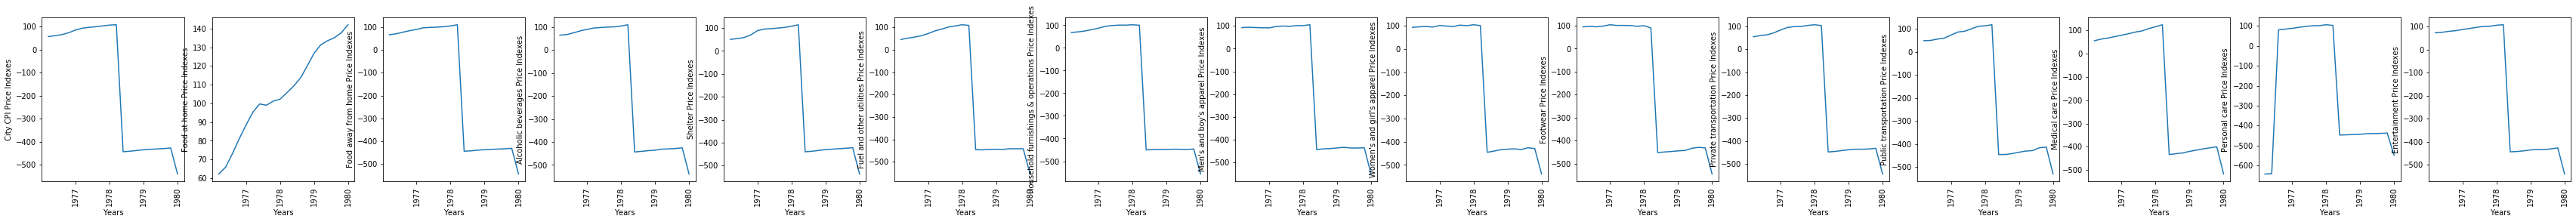

City: Houston


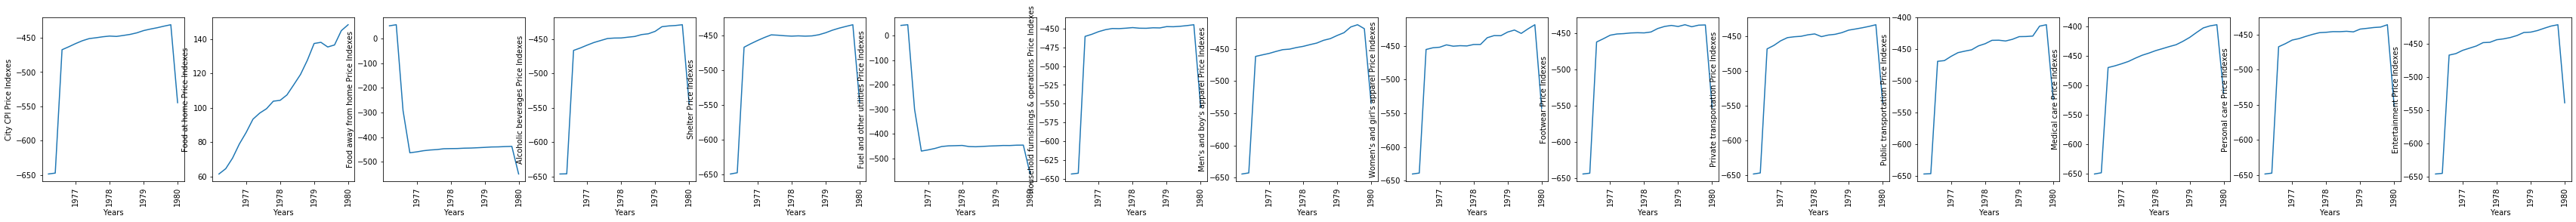

City: Pittsburgh


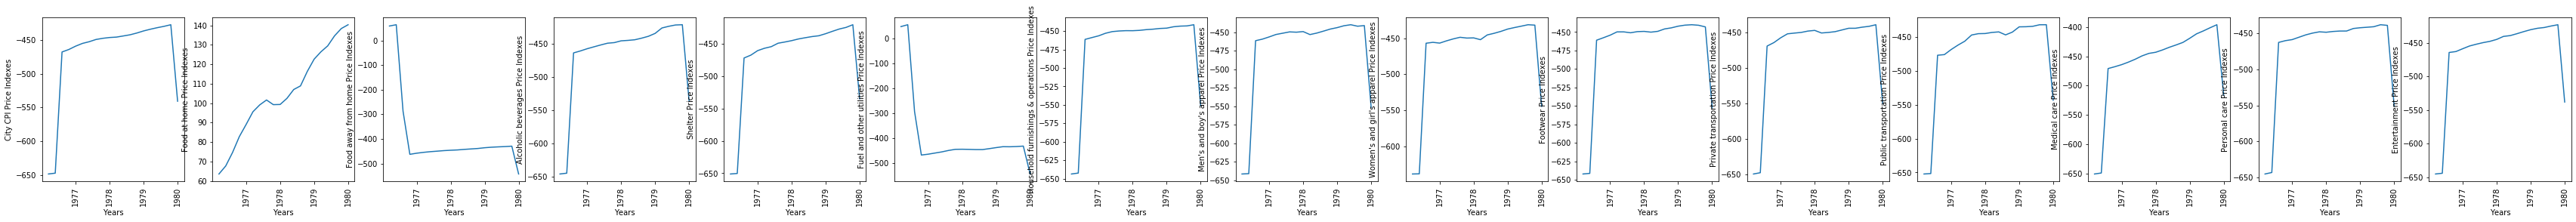

City: San Francisco


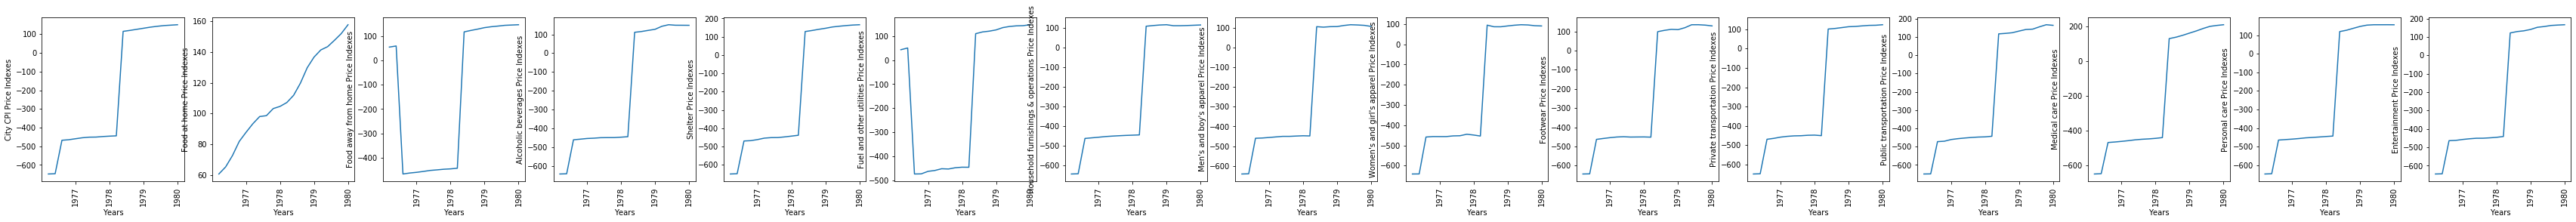

City: Baltimore


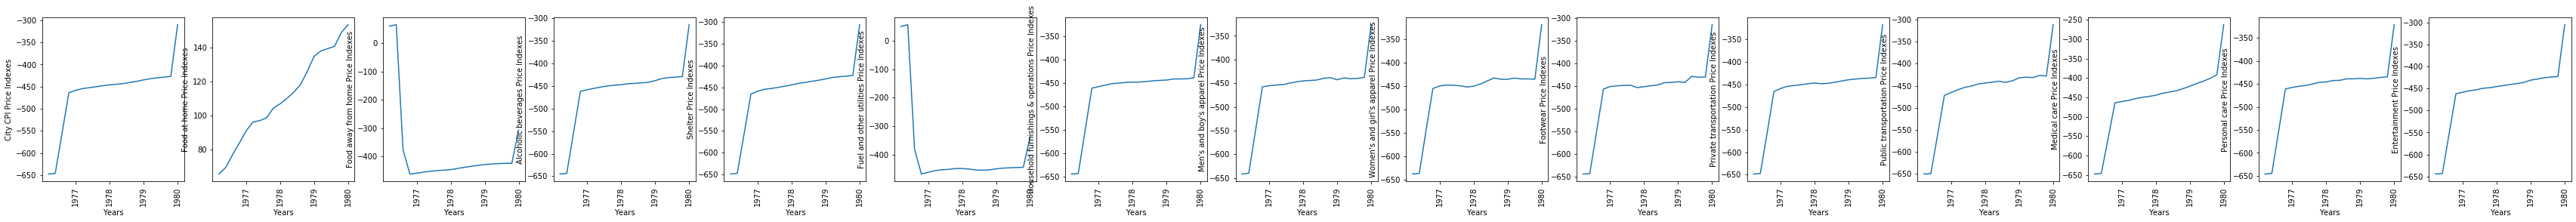

City: Boston


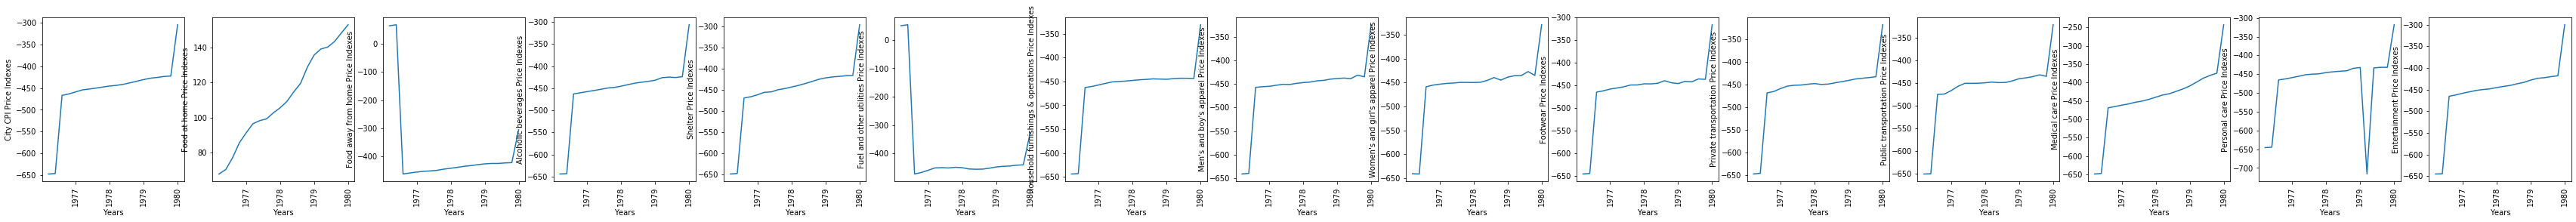

City: Miami


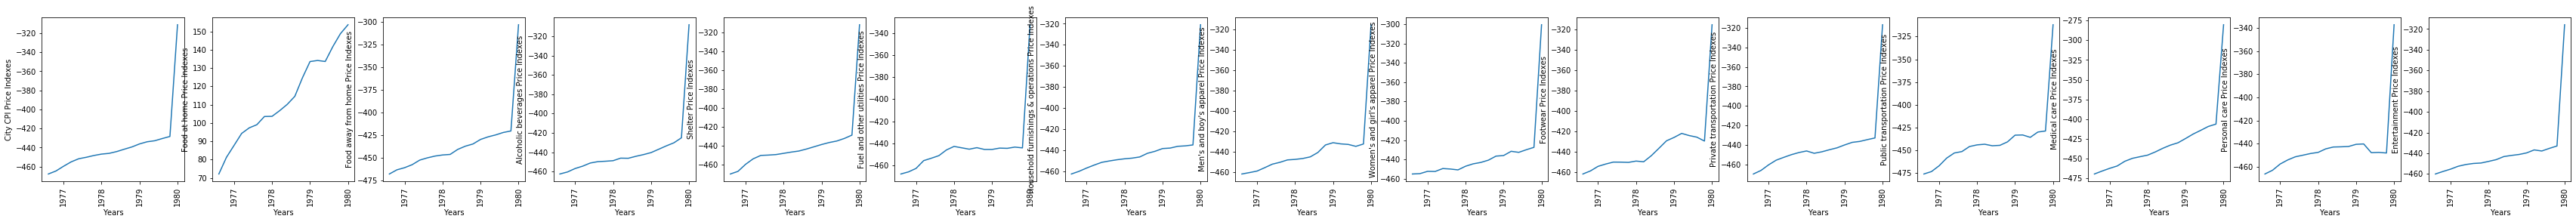

City: St. Louis


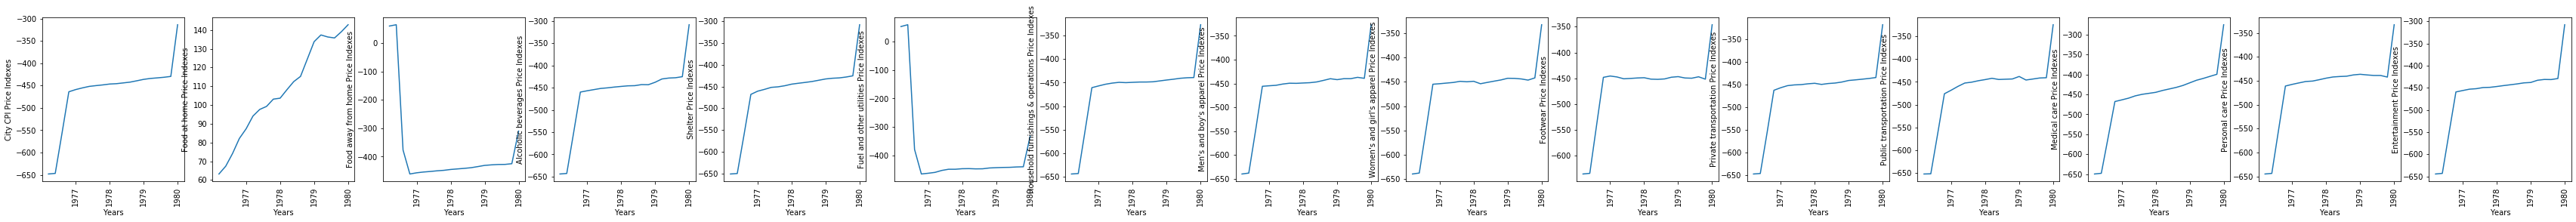

City: Washington, DC


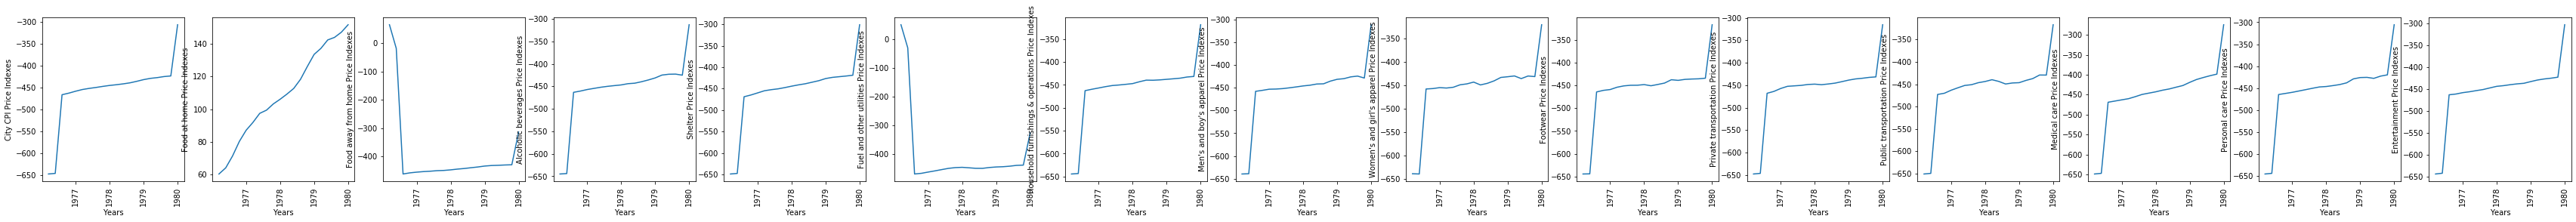

In [26]:
visualise_graphs(usa_cpi_mean, usa_city_names, 1976)

Interestingly, there is a paucity of downward trend examples. To investigate it further, I will drill down to Philadelphia's 9th plot, which represents 'Women's and girl's apparel' category. As seen below, changes in the price level of a weighted average market basket of Women's and girl's apparel actually decreased over time between 1976 and 1995. When I looked at the descriptive statistics, there is no extreme case identifiable, indicating this reduction in the trend may be genuine based on the information provided by this dataset.

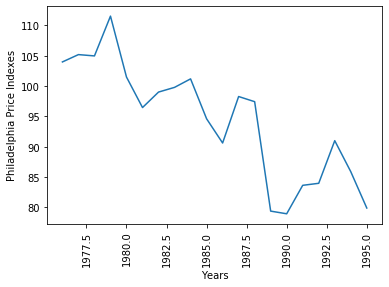

In [27]:
years = [int(year) for year in np.arange(1976,1996)]
ph8 = usa_cpi_mean.loc[:, 'PH8']
plt.plot(years, ph8)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Philadelphia Price Indexes")
plt.show()

In [28]:
ph_apparel_cpi_df = usa_df.filter(regex='PH8')
ph_apparel_cpi_df.describe()

PH8
count  233.000000
mean    94.796567
std     10.798978
min     62.100000
25%     87.600000
50%     96.000000
75%    102.500000
max    120.200000

As briefly mentioned previously, many data points display unreasonable trends. For instance, the overall Miami's CPIs tend to be ranged from -999.999 to 200.000, resulting in the negative mean for most plots. Looking into further details in this case revealed that CPIs in Miami appear to be measured every two months while missing CPIs having a value of -999.999.

In [29]:
usa_df.filter(regex='MI')

MI0    MI1      MI2      MI3      MI4      MI5      MI6      MI7  \
0        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
..       ...    ...      ...      ...      ...      ...      ...      ...   
228  147.300  154.5  160.900  153.600  146.900  112.600  133.400  141.600   
229 -999.999  152.7 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
230  148.700  154.1  161.800  152.800  148.400  112.100  131.500  143.700   
231 -999.999  152.2 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
232  148.600  154.9  162.400  153.000  147.500  112.300  130.600  137.100   

         MI8      MI9     MI10     MI11     MI12     MI13     MI14      MIW  
0        NaN      NaN      NaN      NaN      NaN      NaN      NaN     3.77  
1        NaN      NaN      NaN      NaN      NaN      NaN      NaN     3.77  
2        NaN      NaN      NaN      NaN      NaN      NaN      NaN     3.78  
3        NaN      NaN      NaN      NaN      NaN      NaN      NaN     3.87  
4        NaN      NaN      NaN      NaN      NaN      NaN      NaN     3.81  
..       ...      ...      ...      ...      ...      ...      ...      ...  
228  150.900  148.300  137.700  138.000  196.600  104.500  140.500 -9999.99  
229 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -9999.99  
230  183.600  135.100  137.500  154.700  200.100  106.100  140.100 -9999.99  
231 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999      NaN  
232  162.400  139.100  141.100  147.400  201.700  103.800  140.200      NaN  

[233 rows x 16 columns]

To  solve these issues, I am replacing -999.999 value with the previous value. I did not choose to replace it with means or medians because the CPIs in general tend to increase from the previous values and most recent values in previous months are more relevant than those from years prior.

In [30]:
#forward fill method to replace values
usa_df = usa_df.replace(to_replace=-999.999, method='ffill')

In [31]:
usa_df.describe()

index         CH0         CH1         CH2         CH3         CH4  \
count  233.000000  233.000000  233.000000  233.000000  233.000000  233.000000   
mean   116.000000  106.370386  110.029185  104.248927  112.962661  110.544206   
std     67.405489   29.227897   25.795085   22.750771   26.989484   39.214526   
min      0.000000   53.700000   64.300000   58.800000   73.300000   44.000000   
25%     58.000000   86.700000   96.000000   91.600000   93.400000   79.900000   
50%    116.000000  108.500000  103.300000  106.200000  106.400000  114.200000   
75%    174.000000  132.000000  135.200000  123.200000  130.600000  146.600000   
max    232.000000  153.100000  157.500000  139.400000  163.700000  174.200000   

              CH5         CH6         CH7        CH8  ...         PIW  \
count  233.000000  233.000000  233.000000  233.00000  ...  231.000000   
mean    93.718884   99.670386  107.186695  109.66824  ...   10.556320   
std     22.518044   16.697368   12.469806   12.11158  ...    1.948578   
min     47.000000   64.600000   88.300000   86.50000  ...    6.170000   
25%     77.600000   88.700000   96.300000  100.50000  ...    9.565000   
50%     99.900000  105.300000  104.600000  105.90000  ...   10.980000   
75%    111.500000  114.000000  117.600000  118.20000  ...   11.455000   
max    125.800000  119.900000  140.300000  144.40000  ...   13.870000   

               SFW         CHW          LAW         NYW         PHW  \
count   231.000000  231.000000   231.000000  231.000000  231.000000   
mean  -3109.314805    9.595584 -3110.671299    8.412294    9.931082   
std    4646.988345    2.039760  4646.073502    2.016299    2.501079   
min   -9999.990000    5.730000 -9999.990000    4.830000    5.420000   
25%   -9999.990000    7.840000 -9999.990000    6.610000    7.880000   
50%       8.540000   10.190000     6.670000    8.850000   10.020000   
75%      12.955000   11.170000    10.875000   10.305000   11.915000   
max      14.080000   12.420000    11.910000   11.290000   13.720000   

              WAW         STW          MIW      USAPPI  
count  231.000000  231.000000   231.000000  228.000000  
mean    10.144113   10.589567 -1163.378182   85.203947  
std      2.483309    2.502536  3221.771068   15.405855  
min      5.340000    5.820000 -9999.990000   51.600000  
25%      8.570000    8.430000     4.530000   79.575000  
50%     10.340000   11.140000     6.110000   88.450000  
75%     12.470000   12.820000     7.115000   98.300000  
max     13.900000   14.210000     8.390000  104.800000  

[8 rows x 226 columns]

The minimum value is much less extreme now. Certain data (e.g. SFW) is still suspicous but because it has no category in the goods description, I will skip these for now.

--------

With the processed dataset, I will plot the graphs again.

City: Chicago


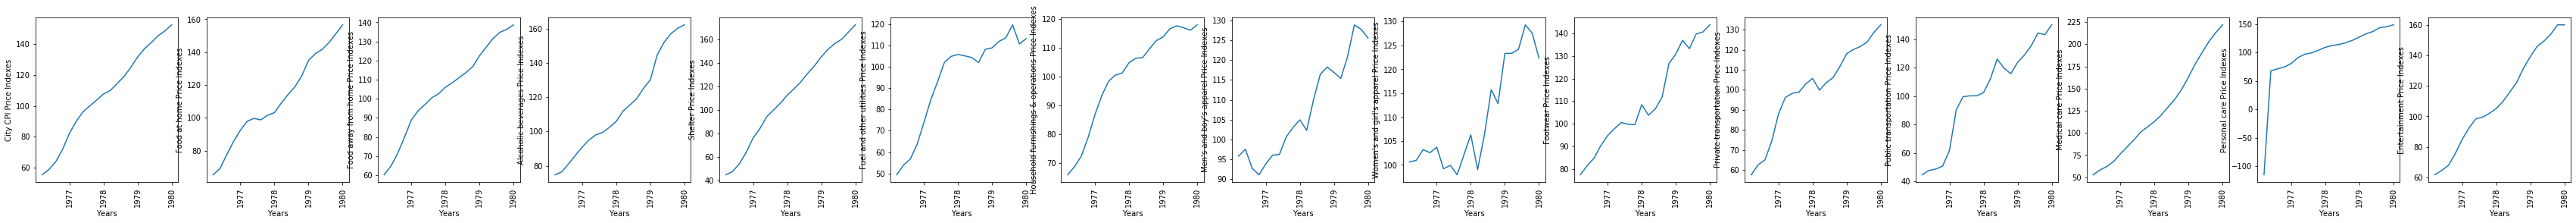

City: Los Angeles


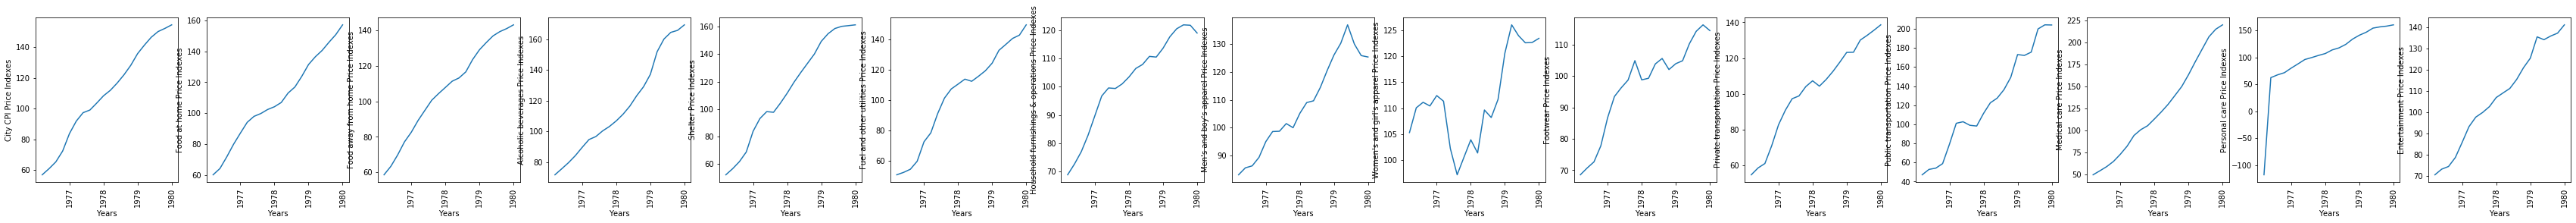

City: New York City


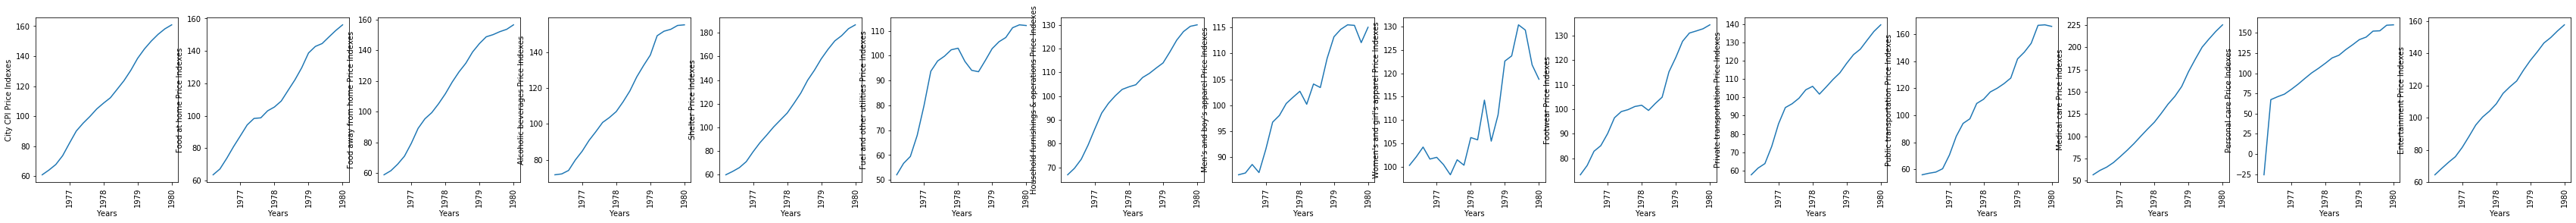

City: Philadelphia


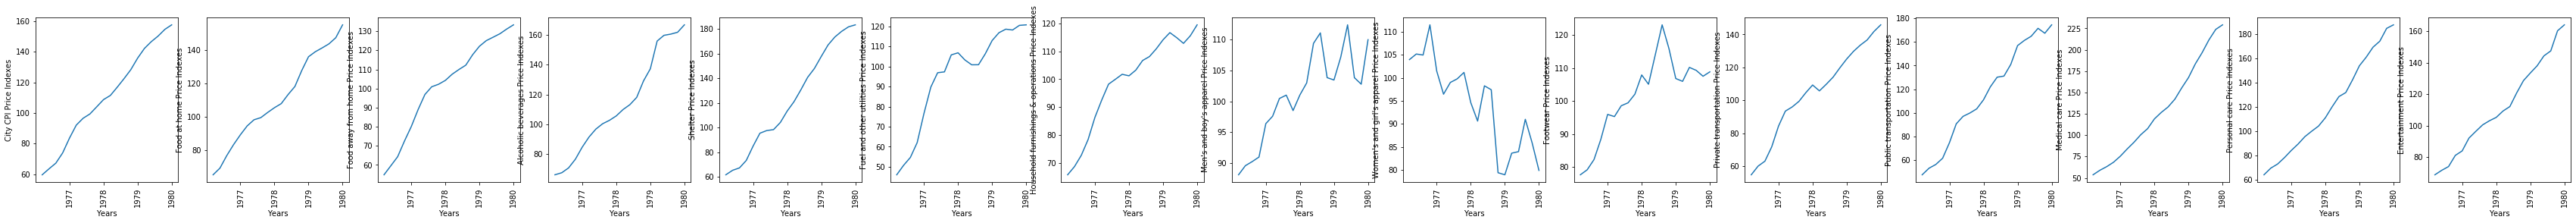

City: Dallas


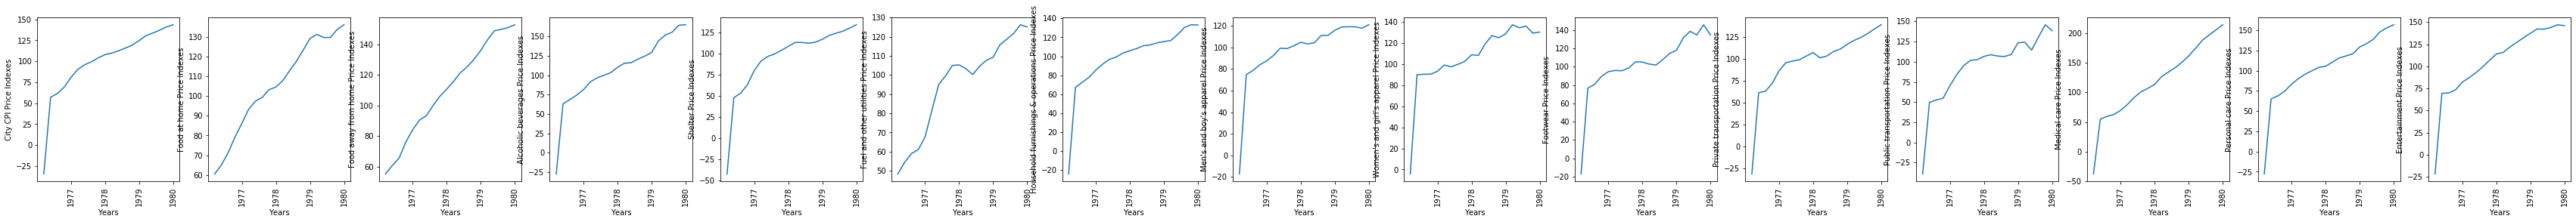

City: Detroit


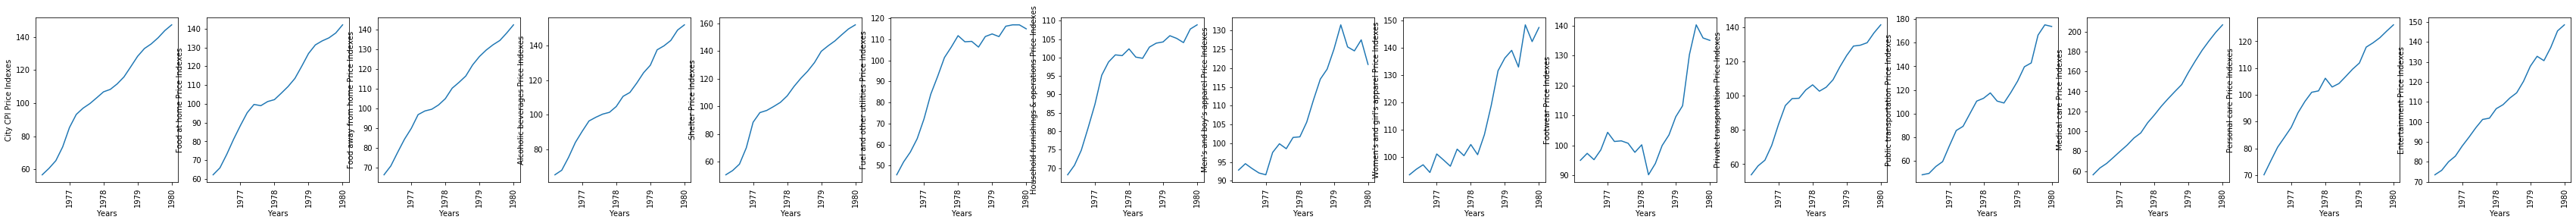

City: Houston


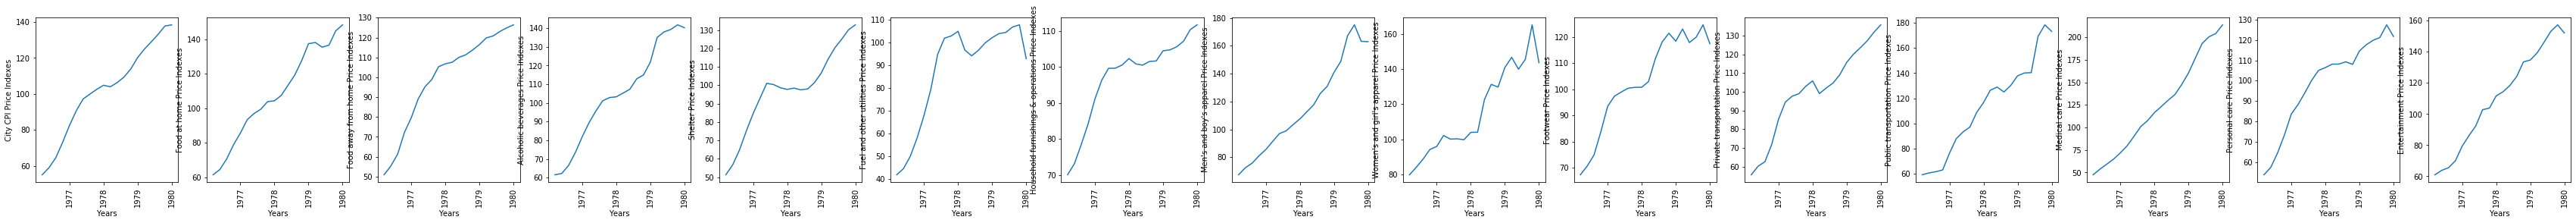

City: Pittsburgh


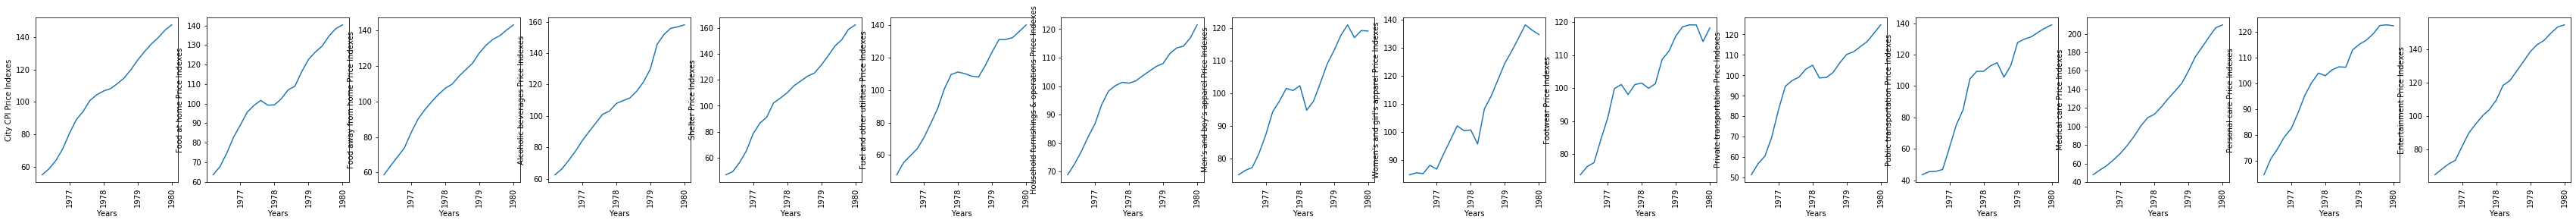

City: San Francisco


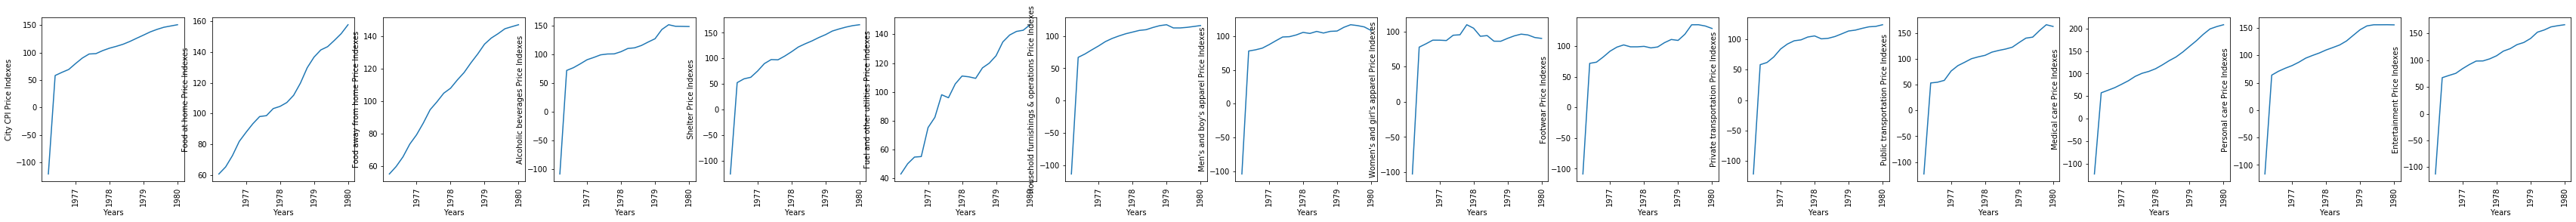

City: Baltimore


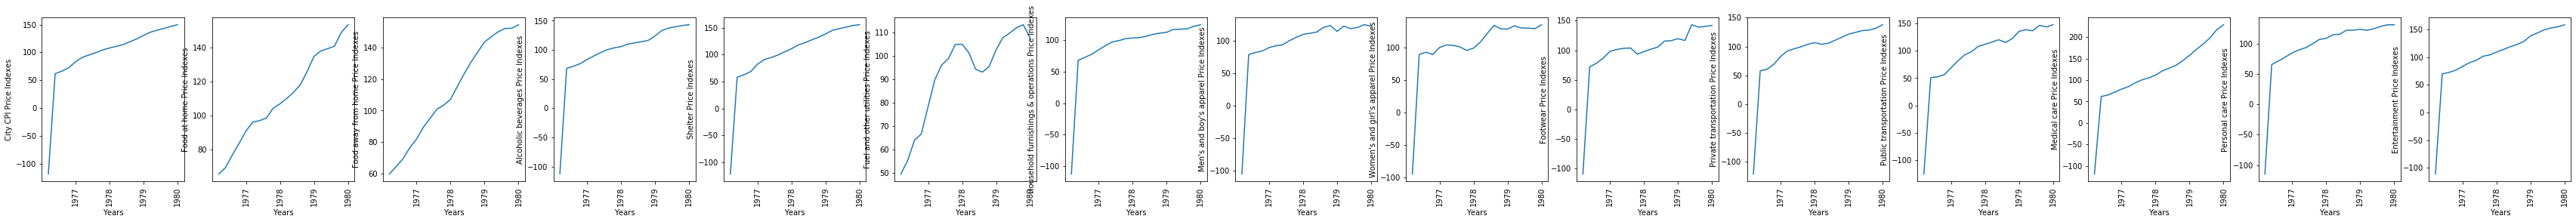

City: Boston


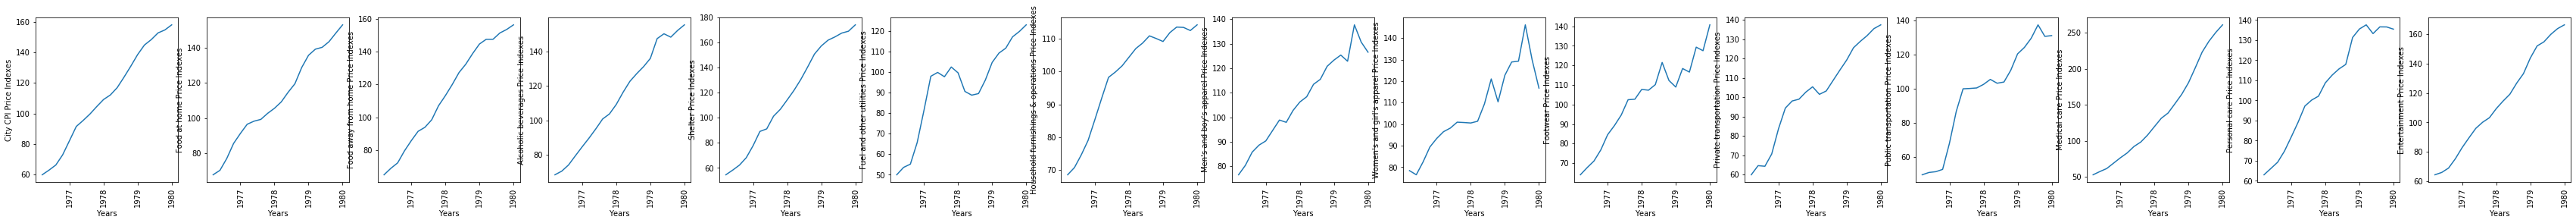

City: Miami


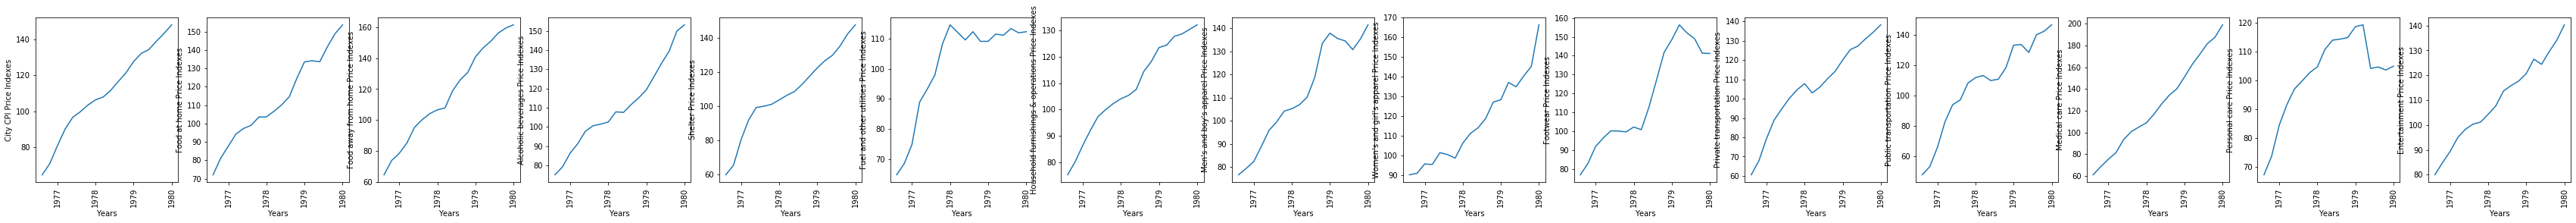

City: St. Louis


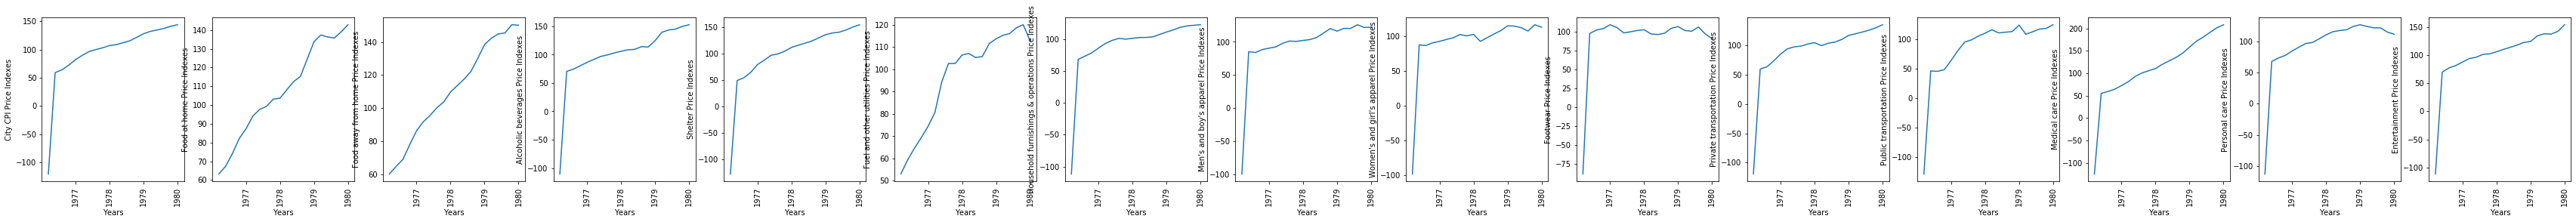

City: Washington, DC


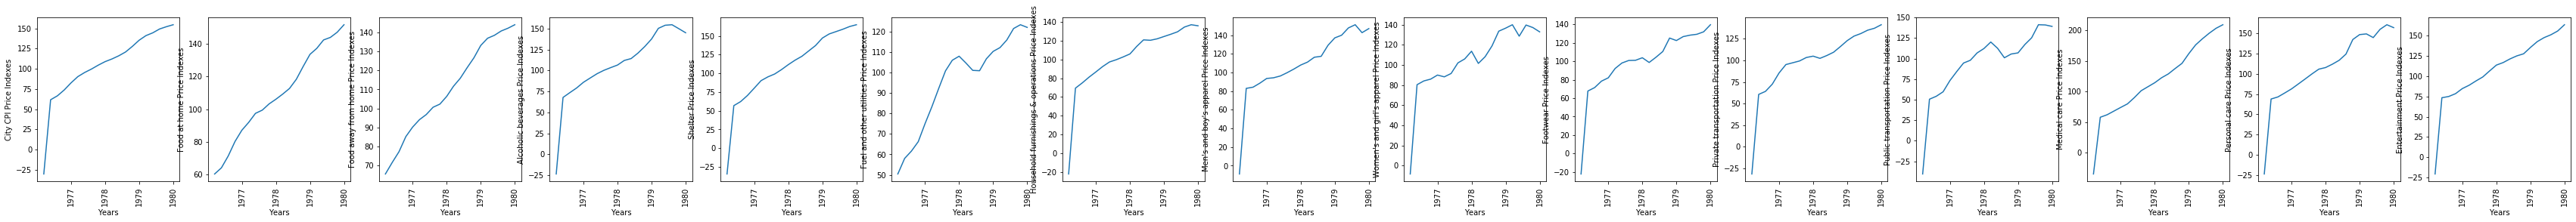

In [33]:
usa_cpi_mean = usa_df.groupby(['Year'], as_index=False).mean()
visualise_graphs(usa_cpi_mean, usa_city_names, 1976)

The graphs seem to be more reasonable. There are still interesting phenomenon - 1) Certain CPIs skyrockted in 1970s and early 1980s but stalled or increased very slowly after this period (e.g. Washington, DC). 2) 'Women's and girl's apparel' category is prone to have a more diverse pattern across different cities.

### CAN CPIs by City

The dataset of Canada was smaller than that of USA, but it did not seem to have integrity issues. Furthermore, as shown below, the graphs across cities and goods categories are less variable - they are upward lines and unlike the USA examples, no downward trends are found.

City: Quebec


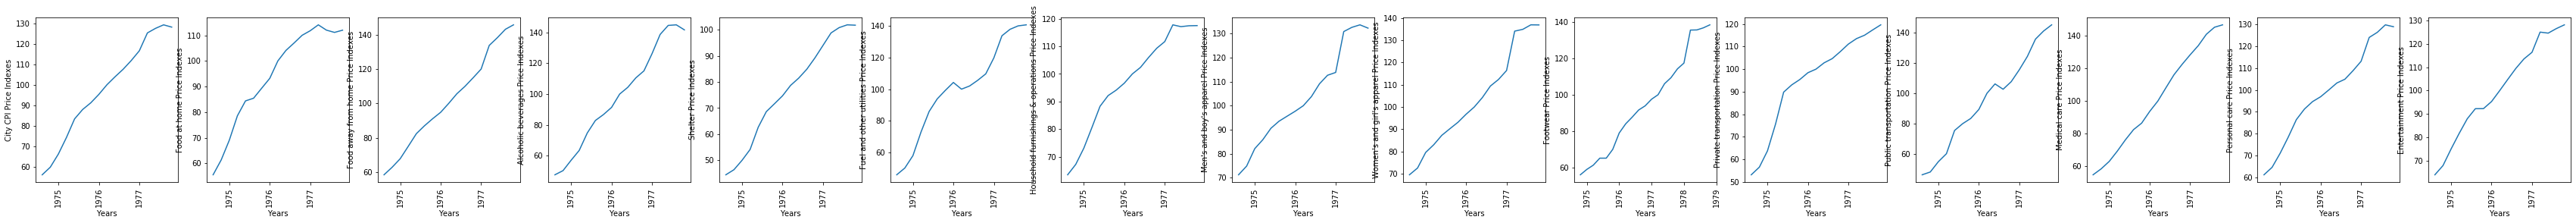

City: Montreal


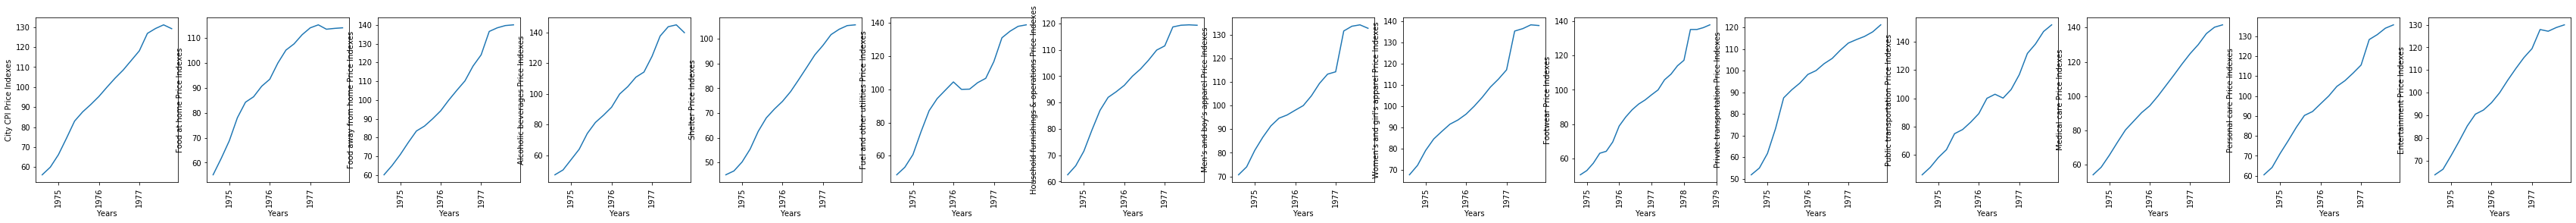

City: Ottawa


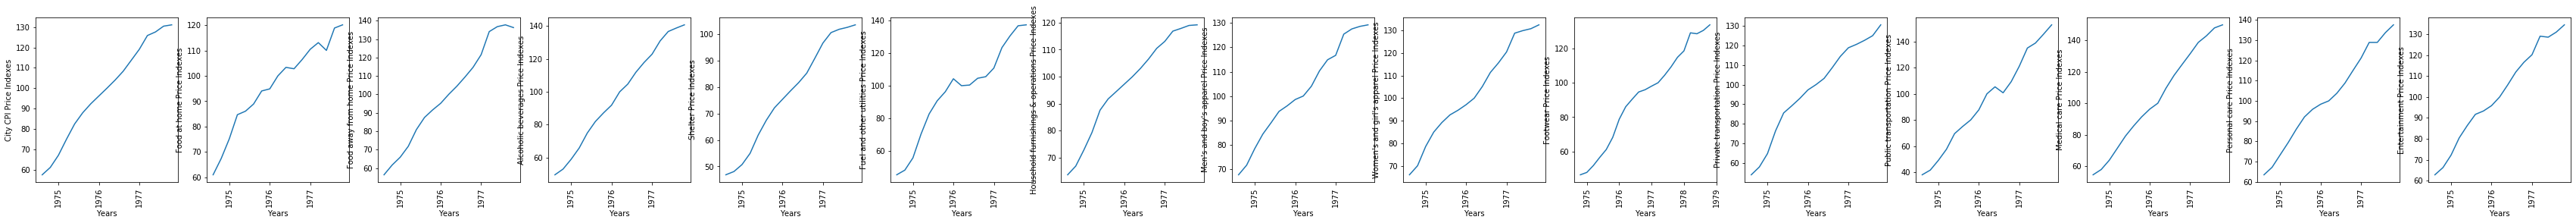

City: Toronto


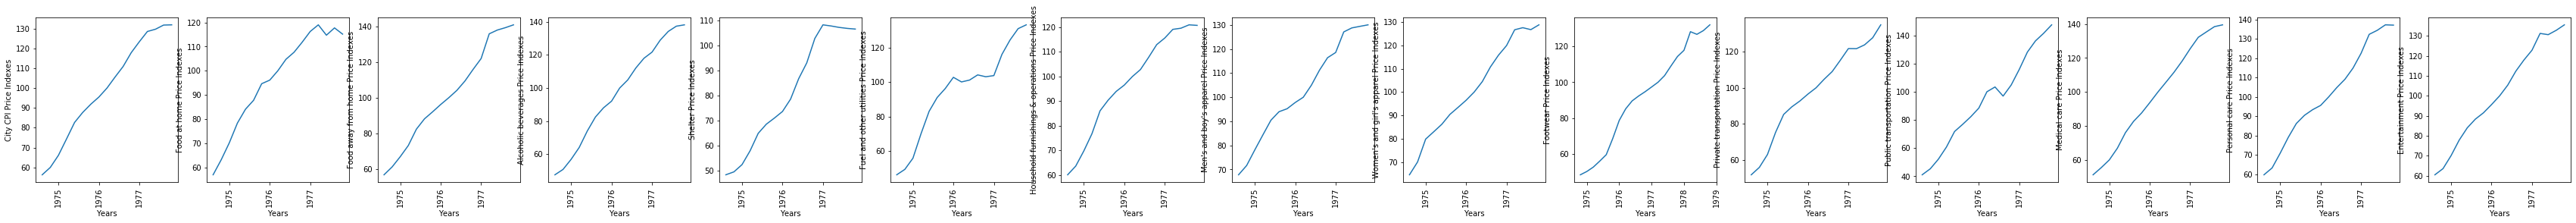

City: Winnipeg


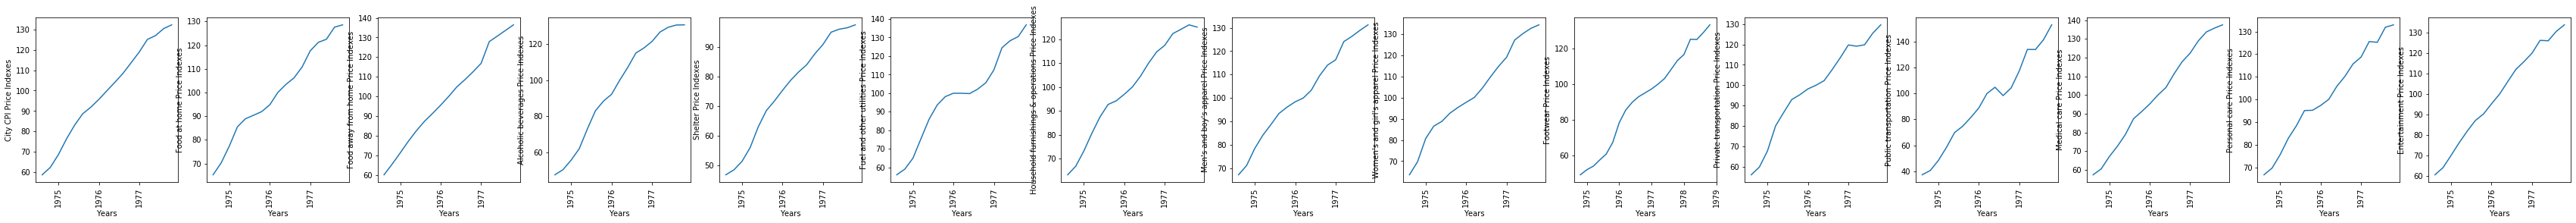

City: Regina


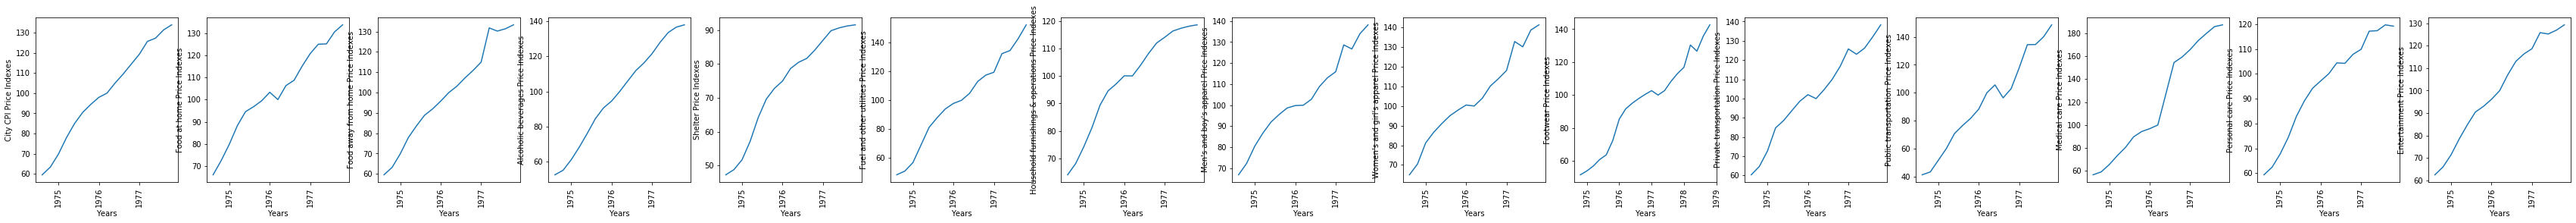

City: Edmonton


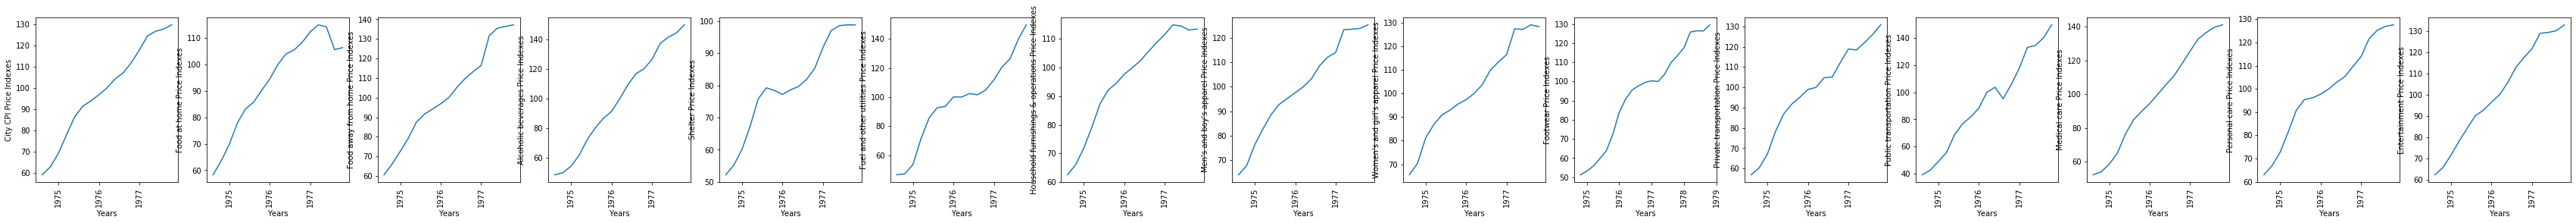

City: Calgary


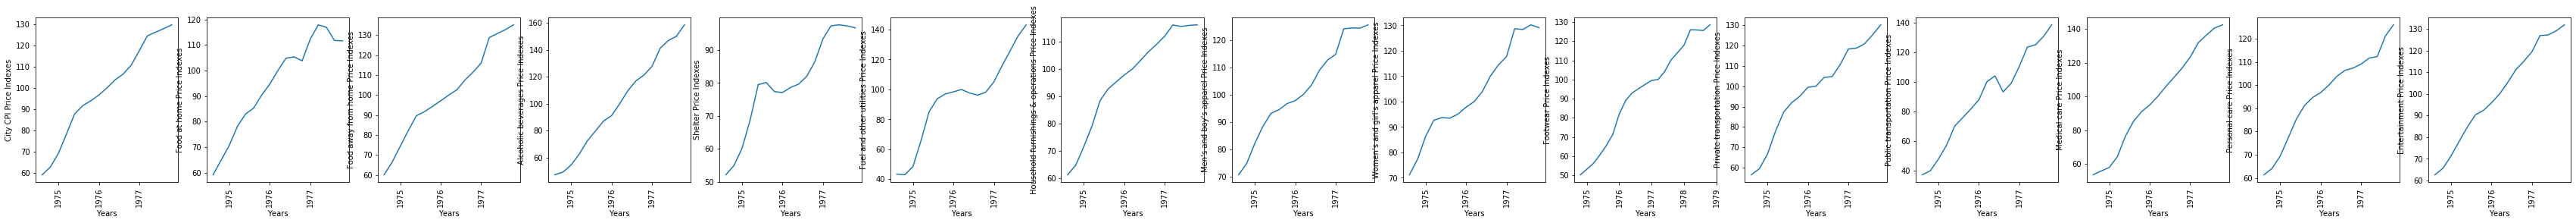

City: Vancouver


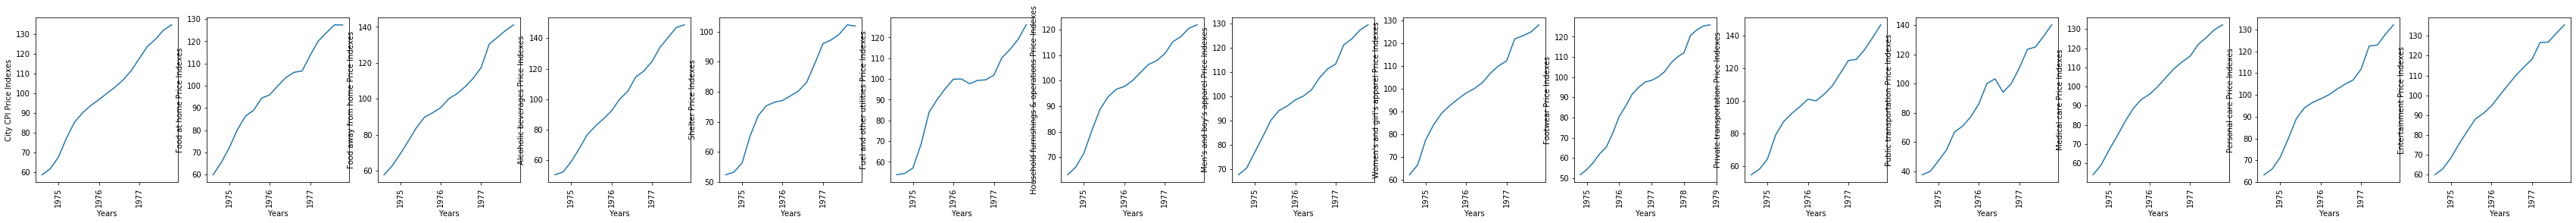

In [34]:
visualise_graphs(can_cpi_mean, can_city_names, 1974)

To look at the holistic graphs differently, I normalised the dataset and made it to a heatmap below. The y-axis represents years ranged from 1976 to 1995 (0 to 247) while the x-axis displays different categories of goods in different cities from Q0 to V14 (Quebec to Vancouver).

As expected, most recent years (i.e. 1995) have larger CPI values, displaying close to 1.0 while older years have CPI values that are close to 0.0. The only category that has the data from 1976 to 1978:08 is 10th category, 'Footwear' which is showing the colour of the graph between 0 and 52 in the y-axis.

In [47]:
min_max = preprocessing.MinMaxScaler()
normalised = min_max.fit_transform(can_df.loc[:, 'Q0':'V14'].values)
normalised_can_df = pd.DataFrame(normalised)

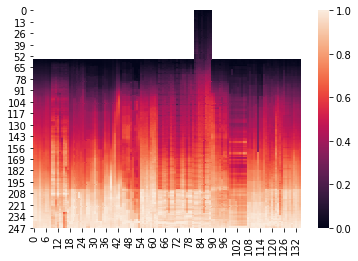

In [48]:
ax = sns.heatmap(normalised_can_df, vmin=0, vmax=1)

## Conclusion

From my perspective, the lesson learnt from this exploratory data analysis in the two cities' CPIs is the importance of data integrity in interpreting any datasets. In case of the USA dataset, having a minimum value of -999.999 or -9999.999 tends to distort the pattern because in general CPIs are expected to increase over time and these minimum values drives the plummeting trend of CPIs. Also, a seemingly-genuine exception is found in the category of 'Women's and girl's apparel' where there was an overall downward pattern in CPIs.